<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Neural_net_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data() #Train test split
#Normilize the input
x_train_full=x_train_full/255.0
x_test=x_test/255.0
#Validation set
x_dev,x_train=x_train_full[:5000],x_train_full[5000:]
y_dev,y_train=y_train_full[:5000],y_train_full[5000:]


In [79]:
class NN:
  def __init__(self,x_train,y_train,x_test,y_test,x_dev,y_dev):
    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_test
    self.y_test=y_test
    self.x_dev=x_dev
    self.y_dev=y_dev
  def EDA(self):
    #Assign labels to categories
    class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
      "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
    #Display training data with its category
    plt.figure(figsize=(3,3))
    plt.imshow(x_train[50],cmap='gray')
    print("The image above represents a {}".format(class_names[y_train[50]]))
    #Return the size and data type of the training data
    print("The training set is of size {}".format(x_train.shape))
    print("This means that the training set has {} images /n and each item is a {}x{} pixels image".
          format(x_train.shape[0],x_train.shape[1],x_train.shape[2]))
    print("The dev set is of size {}/n and the test set is {}".format(x_dev.shape,x_test.shape))
  def NN_train(self,hidden_layers,neurons_per_layers,optimizer):
     self.hidden_layers=hidden_layers,
     self.neurons_per_layers=neurons_per_layers
     self.optimizer=optimizer
     model=keras.Sequential()
     model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #Input layer to avoid shape mismatch
     for i in range(hidden_layers):
        model.add(Dense(neurons_per_layers,activation='relu')) #Hidden layers
     model.add(Dense(10,activation='softmax')) #Output layer
     print(model.summary())
    #Model training
     model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
     history=model.fit(x_train,y_train,epochs=10,validation_data=(x_dev,y_dev))
     return history

The image above represents a Pullover
The training set is of size (55000, 28, 28)
This means that the training set has 55000 images /n and each item is a 28x28 pixels image
The dev set is of size (5000, 28, 28)/n and the test set is (10000, 28, 28)


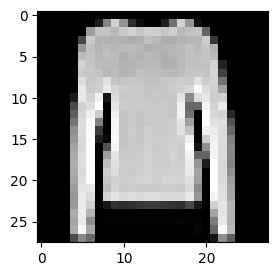

In [80]:
#Test_block
test=NN(x_train,y_train,x_test,y_test,x_dev,y_dev)
test.EDA()

In [85]:
test.NN_train(3,100,Adam(learning_rate=0.01))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_29 (Dense)            (None, 100)               78500     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 100)               10100     
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 99710 (389.49 KB)
Trainable params: 99710 (389.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/10
